<a href="https://colab.research.google.com/github/EmperorTransisthor/DDoS_DetectionModel/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Begin**
In this section, we import libraries to our project, define datatypes, and download + unzip csv dataset

In [ ]:
# here we write all libraries which we are using in project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import gc
import csv
import os, glob
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pickle #for saving our model
from sklearn.model_selection import StratifiedShuffleSplit

#test
from sklearn.decomposition import PCA
import seaborn as sns
from tqdm import tqdm

First of all, we have to define datatypes of our dataset

In [ ]:
dtypes = {
    'Src IP': 'category',
    'Src Port': 'uint16',
    'Dst IP': 'category',
    'Dst Port': 'uint16',
    'Protocol': 'category',
    'Flow Duration': 'uint32',
    'Tot Fwd Pkts': 'uint32',
    'Tot Bwd Pkts': 'uint32',
    'TotLen Fwd Pkts': 'float32',
    'TotLen Bwd Pkts': 'float32',
    'Fwd Pkt Len Max': 'float32',
    'Fwd Pkt Len Min': 'float32',
    'Fwd Pkt Len Mean': 'float32',
    'Fwd Pkt Len Std': 'float32',
    'Bwd Pkt Len Max': 'float32',
    'Bwd Pkt Len Min': 'float32',
    'Bwd Pkt Len Mean': 'float32',
    'Bwd Pkt Len Std': 'float32',
    'Flow Byts/s': 'float32',
    'Flow Pkts/s': 'float32',
    'Flow IAT Mean': 'float32',
    'Flow IAT Std': 'float32',
    'Flow IAT Max': 'float32',
    'Flow IAT Min': 'float32',
    'Fwd IAT Tot': 'float32',
    'Fwd IAT Mean': 'float32',
    'Fwd IAT Std': 'float32',
    'Fwd IAT Max': 'float32',
    'Fwd IAT Min': 'float32',
    'Bwd IAT Tot': 'float32',
    'Bwd IAT Mean': 'float32',
    'Bwd IAT Std': 'float32',
    'Bwd IAT Max': 'float32',
    'Bwd IAT Min': 'float32',
    'Fwd PSH Flags': 'category',
    'Bwd PSH Flags': 'category',
    'Fwd URG Flags': 'category',
    'Bwd URG Flags': 'category',
    'Fwd Header Len': 'uint32',
    'Bwd Header Len': 'uint32',
    'Fwd Pkts/s': 'float32',
    'Bwd Pkts/s': 'float32',
    'Pkt Len Min': 'float32',
    'Pkt Len Max': 'float32',
    'Pkt Len Mean': 'float32',
    'Pkt Len Std': 'float32',
    'Pkt Len Var': 'float32',
    'FIN Flag Cnt': 'category',
    'SYN Flag Cnt': 'category',
    'RST Flag Cnt': 'category',
    'PSH Flag Cnt': 'category',
    'ACK Flag Cnt': 'category',
    'URG Flag Cnt': 'category',
    'CWE Flag Count': 'category',
    'ECE Flag Cnt': 'category',
    'Down/Up Ratio': 'float32',
    'Pkt Size Avg': 'float32',
    'Fwd Seg Size Avg': 'float32',
    'Bwd Seg Size Avg': 'float32',
    'Fwd Byts/b Avg': 'uint32',
    'Fwd Pkts/b Avg': 'uint32',
    'Fwd Blk Rate Avg': 'uint32',
    'Bwd Byts/b Avg': 'uint32',
    'Bwd Pkts/b Avg': 'uint32',
    'Bwd Blk Rate Avg': 'uint32',
    'Subflow Fwd Pkts': 'uint32',
    'Subflow Fwd Byts': 'uint32',
    'Subflow Bwd Pkts': 'uint32',
    'Subflow Bwd Byts': 'uint32',
    'Init Fwd Win Byts': 'uint32',
    'Init Bwd Win Byts': 'uint32',
    'Fwd Act Data Pkts': 'uint32',
    'Fwd Seg Size Min': 'uint32',
    'Active Mean': 'float32',
    'Active Std': 'float32',
    'Active Max': 'float32',
    'Active Min': 'float32',
    'Idle Mean': 'float32',
    'Idle Std': 'float32',
    'Idle Max': 'float32',
    'Idle Min': 'float32',
    'Label': 'category'
}

Importing dataset from kaggle

In [ ]:
# importing dataset from kaggle
os.system('chmod 600 /content/kaggle.json')               # Making kaggle.json invisible to other users of colab
os.environ['KAGGLE_CONFIG_DIR'] =  '/content'             # setting path to folder by using environmental variable
!kaggle datasets download -d devendra416/ddos-datasets    # here we download datasets

100% 2.68G/2.68G [00:26<00:00, 57.5MB/s]
100% 2.68G/2.68G [00:26<00:00, 109MB/s] 


In [ ]:
!unzip \*.zip && rm  *.zip                                # we are using these commands to unzip and then remove zip files

Archive:  ddos-datasets.zip
  inflating: ddos_balanced/final_dataset.csv  
  inflating: ddos_imbalanced/unbalaced_20_80_dataset.csv  


Here we load our dataset and assign datatypes. Since, we don't have lots of RAM, we have to set low_memory option to TRUE

In [ ]:
#######   using panda to view data in our datasets
df_combined = pd.read_csv('/content/ddos_balanced/final_dataset.csv', dtype=dtypes,low_memory=True)
len(df_combined)

#df_mem_prev = df_combined.memory_usage().sum() / 1024**2

12794627

# **Data separation, in case we run out of RAM**

In [ ]:
# SKIP
# here we take 1/2 of our dataset from head and from tail
df_combined.head(3198656).to_csv('dataset_ddos.csv')
df_combined.tail(3198656).to_csv('dataset_benign.csv')

We delete full dataset, which is no longer needed and will only fill memory

In [ ]:
del df_combined
gc.collect()

50

Here we merge it

In [ ]:
#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
del combined_csv
del all_filenames
del extension
gc.collect()

50

We are loading our cut dataset

In [ ]:
df_combined = pd.read_csv('/content/combined_csv.csv', dtype=dtypes,low_memory=True) 
df_mem_post = df_combined.memory_usage().sum() / 1024**2
#print('final_dataset is using', df_mem_prev, ' MBs of RAM')
#print('difference = ', df_mem_prev - df_mem_post)
data = df_combined[['Flow Duration', 'Label']]
data['Label'].value_counts() 

Benign    3198656
ddos      3198656
Name: Label, dtype: int64

**End of data separation**

# **Data processing**

First we verify our data


In [ ]:
df_combined.isna().sum().sum

<bound method Series.sum of Unnamed: 0      0
Unnamed: 0.1    0
Flow ID         0
Src IP          0
Src Port        0
               ..
Idle Mean       0
Idle Std        0
Idle Max        0
Idle Min        0
Label           0
Length: 86, dtype: int64>

In [ ]:
data = df_combined[['Flow Duration', 'Label']]
data['Label'].value_counts() 

Benign    3198656
ddos      3198656
Name: Label, dtype: int64

In [ ]:
del data
gc.collect()

150

Dropping rows with values, which aren't unique

In [ ]:
# dropping collums with one value
colsToDrop = np.array(['Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg'])
gc.collect()

50

In [ ]:
# counting unique values and checking for skewness in the data
rowbuilder = lambda col: {'col': col, 'unique_values': df_combined[col].nunique(), 'most_frequent_value': df_combined[col].value_counts().index[0],'frequency': df_combined[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df_combined.select_dtypes(include=['category']).columns]
skewed = pd.DataFrame(frequency)
skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = np.union1d(colsToDrop, skewed['col'].values)
colsToDrop
del skewed
del rowbuilder
del frequency
gc.collect()

0

Dropping null values

In [ ]:
missing = df_combined.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df_combined)*100}, index=df_combined.columns)
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values
gc.collect()

50

Replacing faulty data

In [ ]:
df_combined['Flow Byts/s'].replace(np.inf, np.nan)
df_combined['Flow Pkts/s'].replace(np.inf, np.nan)
dropnaCols = np.union1d(dropnaCols, ['Flow Byts/s', 'Flow Pkts/s'])
gc.collect()

50

In [ ]:
# perform actual drop
df_combined.drop(columns=colsToDrop)
gc.collect()

53

Regaining RAM in order not to drop the session

In [ ]:
del colsToDrop, missing
gc.collect()

50

In [ ]:
df_combined.dropna(subset=dropnaCols)
gc.collect()

63

In [ ]:
del dropnaCols
gc.collect()

50

In [ ]:
data = df_combined[['Flow Duration', 'Label']]
data['Label'].value_counts() 

Benign    3198656
ddos      3198656
Name: Label, dtype: int64

In [ ]:
del data
gc.collect()

100

Removing rows with negative values

In [ ]:
negValCols = ['Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
for col in negValCols:
    df_combined = df_combined[df_combined[col] >= 0]
gc.collect()

68

In [ ]:
data = df_combined[['Flow Duration', 'Label']]
data['Label'].value_counts() 

ddos      3198656
Benign    3198454
Name: Label, dtype: int64

In [ ]:
del data, negValCols
gc.collect()

150

Now, we have prepared dataset to train our model, but before we do anything, we have to shuffle dataset in order to prevent it from overfitting

In [ ]:
split = StratifiedShuffleSplit()
for train_index, test_index in split.split(df_combined, df_combined["Label"]):
    traindf = df_combined.iloc[train_index]

del df_combined, split
gc.collect();

# **AI TRAINING**

Before we can train our AI, we have to change format of our data to numerical type

In [ ]:
le = preprocessing.LabelEncoder()

timestamp = le.fit_transform(list(traindf["Timestamp"]))
fl_dur = le.fit_transform(list(traindf["Flow Duration"]))
pk_size_avrg = le.fit_transform(list(traindf["Pkt Size Avg"]))
fwd_pkts = le.fit_transform(list(traindf["Fwd Pkts/s"]))
bwd_pkts = le.fit_transform(list(traindf["Bwd Pkts/s"]))
flow_byts = le.fit_transform(list(traindf["Flow Byts/s"]))
flow_pkts = le.fit_transform(list(traindf["Flow Pkts/s"]))
Label = le.fit_transform(list(traindf['Label']))

#X - data on which machine is learning
X = list(zip(timestamp, fl_dur, pk_size_avrg, fwd_pkts, bwd_pkts, flow_byts, flow_pkts)) 
#Y - data which says if data is normal or is anomaly 
Y = list(Label)            

Regaining RAM once again

In [ ]:
# here we divide our data to 2 sets: training and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)   # test_size = 0.1 draws 10% of dataset

In [ ]:
del X, Y, traindf
#del x_test, y_test
gc.collect()

0

To train our our model, we have chosen KNN method. We have iteratively checked the most optimal value for n_neighbours = 9

In [ ]:
#here we train our machine
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
# saving our model
with open("ddosdetectormodel.pickle","wb") as ddos:
  pickle.dump(model, ddos)

# Testing our model on balanced dataset

In [ ]:
acc = model.score(x_test, y_test)
print("Prediction accuracy: ", acc)

Prediction accuracy:  0.9981293639490048


Confusion Matrix for data, where we have trained our AI

In [ ]:
y_pred = model.predict(x_test)
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[287580    689]
 [   388 287083]]


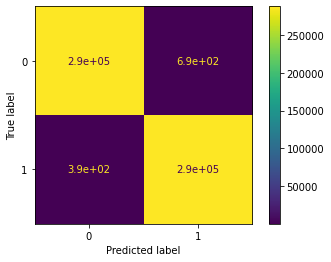

In [ ]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

Precision of our algorithm

In [ ]:
precision_m = precision_score(y_test, y_pred, average=None)
print("Precision in benign traffic detection: ", precision_m[0])
print("Precision in DDoS traffic detection:   ", precision_m[1])

Precision in benign traffic detection:  0.9986526280697855
Precision in DDoS traffic detection:    0.9976057434357756


Recall of our algorithm

In [ ]:
recall_m = recall_score(y_test, y_pred, average=None)
print("Recall of benign traffic: ", recall_m[0])
print("Recall of DDoS traffic:   ", recall_m[1])

Recall of benign traffic:  0.9976098713354541
Recall of DDoS traffic:    0.9986502986388193


Loss

In [ ]:
loss = log_loss(y_test, y_pred)
print("Log loss is ", loss)

Log loss is  0.06461043717641432


In [ ]:
# Regaining some RAM
del x_test
del y_test
del x_train
del y_train
gc.collect()

3638

Now, we consider our algorithm to be quite precise. Unfortunately, we can't make it even better, because colab machine has limted resources. With full dataset, we would 've made our algorithm even more precise with better Loss parameter. The problem is, that we have tested our algorithm on dataset, which is balanced. This is important, because in reality, DDoS attacks aren't occuring on a daily basis. Therefore, we have to test it on unbalanced dataset, which is much closer to the reality, than balanced.

# Unbalanced dataset test

To make the test legit, we have to test it on unbalanced dataset, because real environment is unbalanced. 

In [ ]:
df_test = pd.read_csv('/content/ddos_imbalanced/unbalaced_20_80_dataset.csv', dtype=dtypes,low_memory=True)

In [ ]:
# here we load imbalanced dataset
# df_train = pd.read_csv('/content/ddos_imbalanced/unbalaced_20_80_dataset.csv', dtype=dtypes,low_memory=True, nrows = 1000000)  

timestamp = le.fit_transform(list(df_test["Timestamp"]))
fl_dur = le.fit_transform(list(df_test["Flow Duration"]))
pk_size_avrg = le.fit_transform(list(df_test["Pkt Size Avg"]))
fwd_pkts = le.fit_transform(list(df_test["Fwd Pkts/s"]))
bwd_pkts = le.fit_transform(list(df_test["Bwd Pkts/s"]))
flow_byts = le.fit_transform(list(df_test["Flow Byts/s"]))
flow_pkts = le.fit_transform(list(df_test["Flow Pkts/s"]))
Label = le.fit_transform(list(df_test['Label']))

#X - data on which AI is testing itself
X_test = list(zip(timestamp, fl_dur, pk_size_avrg, fwd_pkts, bwd_pkts, flow_byts, flow_pkts)) 
#Y - data which says if data is normal or is anomaly 
Y_test = list(Label) 

x_train2, x_test, y_train2, y_test = sklearn.model_selection.train_test_split(X_test, Y_test)

In [ ]:
del X_test, Y_test, df_test, x_train2, y_train2
gc.collect()

0

# **Testing our model on Unbalanced Dataset**

In [ ]:
acc = model.score(x_test, y_test)
print("Prediction accuracy: ", acc)

Prediction accuracy:  0.8769830599623555


In [ ]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[1535109,   45419],
       [ 188821,  134779]])

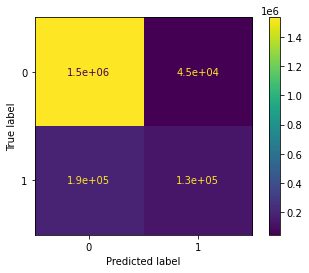

In [ ]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [ ]:
precision_m = precision_score(y_test, y_pred, average=None)
print("Precision in benign traffic detection: ", precision_m[0])
print("Precision in DDoS traffic detection:   ", precision_m[1])

Precision in benign traffic detection:  0.8904706107556571
Precision in DDoS traffic detection:    0.7479494777966459


In [ ]:
recall_m = recall_score(y_test, y_pred, average=None)
print("Recall of benign traffic: ", recall_m[0])
print("Recall of DDoS traffic:   ", recall_m[1])

Recall of benign traffic:  0.971263400585121
Recall of DDoS traffic:    0.41649876390605683


In [ ]:
loss = log_loss(y_test, y_pred)
print(loss)

4.248873657474477


In [ ]:
# if we don't want colab to disconnect from session
while True:pass

KeyboardInterrupt: ignored

In [ ]:
#del model
del traindf, split
gc.collect()

# **Conclusions**

In unbalanced dataset, our algorithm is very precise in determining Benign traffic, but much less efficient in catching DDoS traffic. We are quite convinced, that further data processing would solve the problem, since we were training our model on wrongly balanced dataset.

Model saving

In [ ]:
traindf.to_csv('traindf.csv')
with open("ddosdetectormodel.pickle","wb") as ddos:
  pickle.dump(model, ddos)

Model loading

In [ ]:
#wczytanie zapisanego przez nas modelu
pickle_read = open("ddosdetectormodel.pickle", "rb")
model = pickle.load(pickle_read)

# **Future plans**

Next step of project would be to use created model, which would gather information about traffic in network and detect possible ddos attacks. When detected, it would inform us about attack. 
Futher implementation would be done on Raspberry Pi 4B.
